## Linear regression model for imdb dataset

### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine learning Model (Linear Regression)</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction
##### in this project i will work on a tmdb-movies data which has the properties for the movies which has been released and my goal to predict IMDB ratings for movies

In [4]:
# import some important modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
# load my imdb-data set 
df = pd.read_csv('tmdb-movies.csv')

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# data frame Shape
df.shape

(10866, 21)

In [8]:
# print information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [9]:
# check for duplicated rows 
df.duplicated().sum()

1

In [10]:
# drop duplicated Row
df.drop_duplicates(inplace=True)

In [11]:
#test
df.duplicated().sum()

0

In [12]:
# check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# drop the columns with which have a lot of null values
#df.drop(['homepage','tagline','keywords','imdb_id','original_title','cast','director','overview'],axis=1,inplace=True)

In [14]:
# check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
# drop rows with null values 
df.dropna(inplace=True)

In [16]:
#test 
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
# check for shape 
df.shape

(1992, 21)

In [18]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
#rename columns for better readability
df.rename(columns = {'budget_adj':'budgett', 'revenue_adj':'revenuee'}, inplace=True)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budgett,revenuee
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [20]:
def edit(s):
    s = str(s).replace('|', ',')
    return (s)

In [21]:
df['genres']=df['genres'].apply(edit)

In [22]:
# generes problem >> convert from string into list 
df['genres'] = df['genres'].str.split(',')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budgett,revenuee
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [23]:
# convert genres into series and merge with the original data frame
df_genre = df.genres.apply(pd.Series)
df=df.merge(df_genre, left_index=True, right_index = True)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budgett,revenuee,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN


In [24]:
df.columns

Index([                  'id',              'imdb_id',           'popularity',
                     'budget',              'revenue',       'original_title',
                       'cast',             'homepage',             'director',
                    'tagline',             'keywords',             'overview',
                    'runtime',               'genres', 'production_companies',
               'release_date',           'vote_count',         'vote_average',
               'release_year',              'budgett',             'revenuee',
                            0,                      1,                      2,
                            3,                      4],
      dtype='object')

In [25]:
# drop unnecessary columns 
df.drop(['genres',1,2,3,4],axis=1,inplace=True)

In [26]:
# replace 0 column with genre 
df.rename(columns = {0:'genre'}, inplace=True)

In [27]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budgett,revenuee,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [28]:
df['genre'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'War', 'Mystery', 'Fantasy',
       'Thriller', 'Romance', 'Horror', 'History', 'Documentary',
       'Animation', 'Music', 'TV Movie'], dtype=object)

In [29]:
df['genre']=df['genre'].astype('category')
df['genre']=df['genre'].cat.codes

In [30]:
df['genre'].unique()

array([ 0,  1, 18, 14,  6,  7,  3,  4, 17, 12,  8, 16, 13, 10,  9,  5,  2,
       11, 15], dtype=int8)

In [31]:
df.shape

(1992, 21)

In [32]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budgett,revenuee,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
### what are properties which will be associated with highly rated movie ?

the most two important columns here are the popularity and vote average

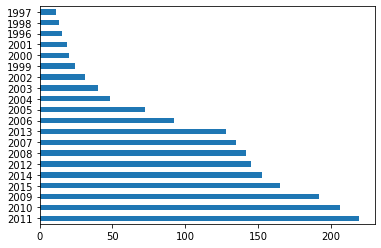

In [33]:
df['release_year'].value_counts()[:20].plot(kind='barh');

the above plot shows the number of movies based on the released year

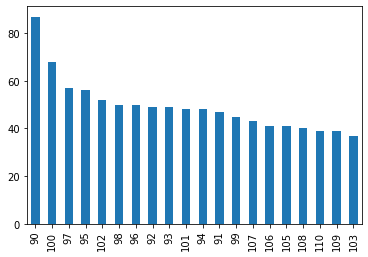

In [34]:
df['runtime'].value_counts()[:20].plot(kind='bar');

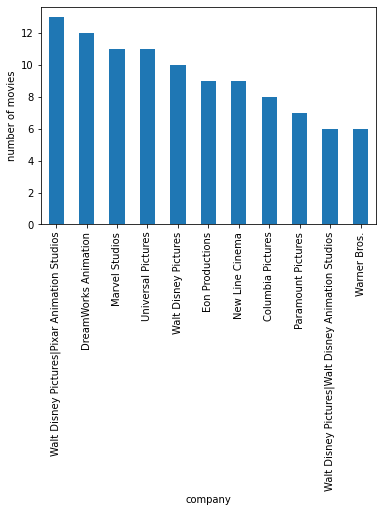

In [35]:
df['production_companies'].value_counts().sort_values(ascending=False)[0:11]\
.plot(kind='bar',xlabel='company',ylabel='number of movies');

the above plot shows the number of movies for 10 high companies 

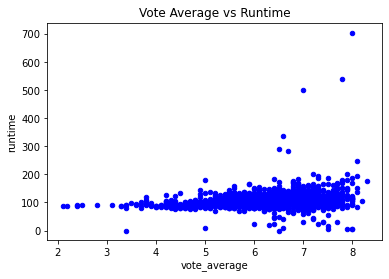

In [36]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'blue')
plt.title('Vote Average vs Runtime')
plt.show();

this scatter plot shows us that there is a weak relation ship between vote average and runtime and it shows that the longest movie has a high vote avergae 

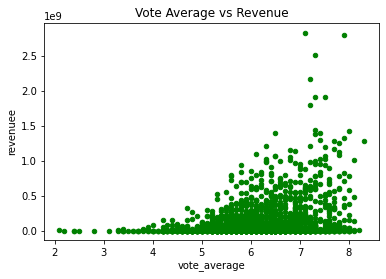

In [37]:
df.plot(x='vote_average',y='revenuee',kind='scatter', color = 'green')
plt.title('Vote Average vs Revenue')
plt.show()

the above plot shows us the high voted movies tends to high revenue , it also a positive correlation 

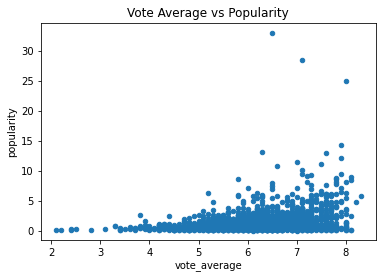

In [38]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

### Research Question 2  (Does high budget movies affect on high voting of viewers?

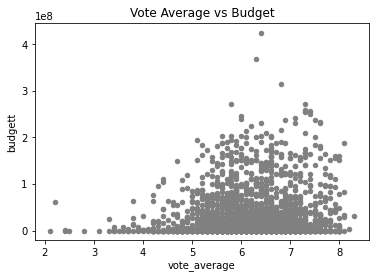

In [39]:
df.plot(x='vote_average',y='budgett',kind='scatter', color = 'gray')
plt.title('Vote Average vs Budget')
plt.show()

we can deduce that from the above plot that the high budget movie leads to a high voting by people ,it can be a positive correlation 

### what is the period in which there are high voting movies?

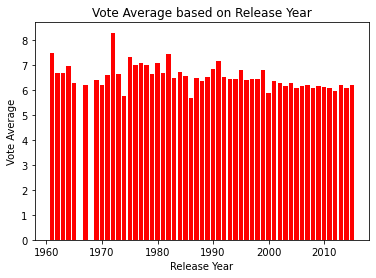

In [40]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'red')
plt.title('Vote Average based on Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

the above chart shows that the period between 1970 and 1985 has most highly voted movies 

## Machine learning Model (Linear regression)

In [41]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budgett                 float64
revenuee                float64
genre                      int8
dtype: object

In [42]:
#Defining features and target for this dataset based on co-relation

features = ['popularity','runtime','vote_count','release_year','budget','vote_average','genre']
target = ['revenue']

In [43]:
#splitting data set into training and test data set in 0.7/0.2
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.30)
train.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budgett,revenuee,genre
7576,8270,tt0427470,0.451544,16000000,5367030,The Lookout,Joseph Gordon-Levitt|Jeff Daniels|Matthew Good...,http://video.movies.go.com/thelookout/,Scott Frank,Whoever has the money has the power,...,Chris is a once promising high school athlete ...,99,Miramax Films,3/9/07,93,6.7,2007,1.682670e+07,5.644337e+06,4
7041,4380,tt0358135,0.877660,50000000,170128460,Shall We Dance?,Richard Gere|Jennifer Lopez|Susan Sarandon|Lis...,http://www.miramax.com/shallwedance/,Peter Chelsom,Step out of the ordinary,...,"A romantic comedy where a bored, overworked Es...",107,Miramax Films,10/15/04,172,5.8,2004,5.772227e+07,1.964040e+08,6
9539,34311,tt0096118,0.254965,0,0,Sleepaway Camp II: Unhappy Campers,Pamela Springsteen|Brian Patrick Clarke|Walter...,http://www.sleepawaycampmovies.com/,Michael A. Simpson,When you go camping just take the essentials.,...,"Angela Baker, a psychotic transsexual, escapes...",80,Double Helix Films,10/31/88,20,6.0,1988,0.000000e+00,0.000000e+00,10
1639,29426,tt1134854,0.394989,4000000,143191,Survival of the Dead,Alan van Sprang|Kenneth Welsh|Kathleen Munroe|...,http://magnetreleasing.com/survivalofthedead/,George A. Romero,Death isn't what it used to be.,...,"On an island off the coast of North America, l...",90,Devonshire Productions|Artfire Films|New Romer...,9/9/09,35,4.6,2009,4.065602e+06,1.455394e+05,10
6571,496,tt0443453,1.930735,18000000,261572744,Borat: Cultural Learnings of America for Make ...,Sacha Baron Cohen|Ken Davitian|Luenell|Pamela ...,http://www.boratmovie.com/,Larry Charles,"Come to Kazakhstan, it's nice!",...,Kazakh journalist Borat Sagdiyev travels to Am...,82,Twentieth Century Fox Film Corporation|Four By...,11/2/06,979,6.4,2006,1.947004e+07,2.829352e+08,3


In [44]:
#Fill the training and test data with require information
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [45]:
y_train.shape

(1394, 1)

In [46]:
# import linear Regression model 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
lin_reg = linear_model.Lasso(alpha=0.1) 

In [47]:
# fit the model using x_train and y_train
lin_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [48]:
lin_score_train = lin_reg.score(X_test, y_test)
lin_score_test = lin_reg.score(X_train, y_train)

In [49]:
print("Testing score: ",lin_score_test.round(1) * 100,'%')

Testing score:  70.0 %


In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)

In [51]:
tree_reg.fit(X_train.values,y_train.values)

DecisionTreeRegressor(max_depth=5)

In [52]:
tree_reg_score = tree_reg.score(X_train, y_train);

In [53]:
print("Testing score: ",tree_reg_score.round(1) * 100 ,'%')

Testing score:  80.0 %


In [54]:
from sklearn import neighbors
n_neighbors=3
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
knn_score_test = knn.score(X_train, y_train)

In [56]:
print("Testing score: ",knn_score_test.round(1) * 100,'%')

Testing score:  80.0 %


# Conclusions 

there many factors that affect movies and make it unique from one another ,in this project i do analyse these factors and know which of them affect revenue.

first of all i do cleaning the data set by removing null values from rows ,removing duplicated values and covert geners column from string to list and assign genre to each movie.

then i do some charts and plot them to know which variable is dependent budget or revenue as they were more distributed.

after that i plotted some vriables as shown above and found that movies with higher revenue leads to higher budgets and higher vote averages  .

I also found that movies released between 1970-1985,leads  to be voted higher than others.

### limitations
1- I found that limitations to draw the last chart so i grouped the movies by genre and draw the chart <br>
2- Also due to the columns represent a categorical data and the type of selected questions ,i used the above charts to visulize the data such as scatter and bar  <br>
3- I found the score is low when I used linear regression so I tried another algorithms to improve the score of the model 
